
# Intuition

    1. Expression: 
        y = b0 + b1*x1 + b2*x1^2 + b3*x1^3 + ... + bn*x1^n

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Dataset

In [2]:
dataset = pd.read_csv("Chapter_4_Position_Salaries_Data.csv")
X = dataset.iloc[:, 1:-1].values 
Y = dataset.iloc[:,-1].values
print(X,Y)
#iloc-> locate indexes
# We use .values to convert it into numpy array.

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Encoding Categorial Data

We dont need to encode the column 1 i.e the Positions of employees, as they are already unique. Further we will also not include it in our training set.

# Spliting the Dataset

Since we have not got enough data, lets train our model entirely on the dataset and just randomly predict for some values.

# Training the Linear Regression Model on the dataset

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Training the Polynomial Regression Model on the dataset

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualising Linear Regression Results

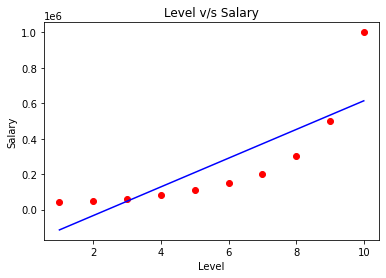

In [5]:
plt.scatter(X, Y, color = "red")
plt.plot(X, lin_reg.predict(X), color="blue")
plt.title("Level v/s Salary")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Visualising Polynomial Regression Results

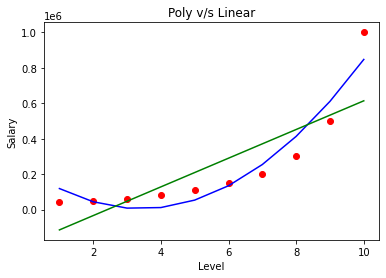

In [6]:
plt.scatter(X, Y, color = "red")
plt.plot(X, lin_reg_2.predict(x_poly), color="blue")
plt.plot(X, lin_reg.predict(X), color="green")
plt.title("Poly v/s Linear")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)

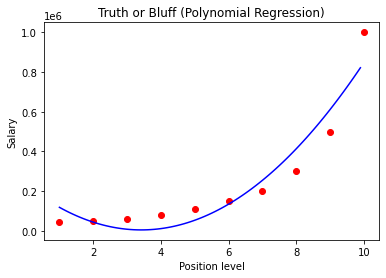

In [7]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [8]:
print(lin_reg_2.predict(poly_reg.fit_transform([[6.5]])))
# Output of poly_reg.fit_transform([[6.5]]) -> [[1, 6.5, 42.25]]
print(lin_reg.predict([[6.5]]))

[189498.10606061]
[330378.78787879]
